## Packages

Let's run the cell below to import all the packages needed.


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.utils.class_weight import compute_class_weight
%matplotlib widget
import matplotlib.pyplot as plt
import NNutils


### Loading the data

In [17]:
X_train = np.load("savedData/150x150_propVal_aug_balanced/real/x_train.npy")
Y_train = np.load("savedData/150x150_propVal_aug_balanced/real/y_train.npy")
x_val=np.load("savedData/150x150_propVal_aug_balanced/real/x_val.npy") #cross validation data 
y_val=np.load("savedData/150x150_propVal_aug_balanced/real/y_val.npy") #cross validation data 
x_test=np.load("savedData/150x150_propVal_aug_balanced/real/x_test.npy") #test set image
y_test=np.load("savedData/150x150_propVal_aug_balanced/real/y_test.npy") #test set classification


### Visualisation

we can print the shape of each array

In [18]:
print("the shape of X_train is", X_train.shape)
print("the shape of y is", Y_train.shape)
print("x_small shape is", x_val.shape)
print("y_small shape is", y_val.shape)
print("x_test shape is", x_test.shape)
print("y_test shape is ", y_test.shape)

the shape of X_train is (9564, 150, 150, 1)
the shape of y is (9564,)
x_small shape is (1044, 150, 150, 1)
y_small shape is (1044,)
x_test shape is (624, 150, 150, 1)
y_test shape is  (624,)


we can print the first element of each array

the first element of X is [[[0.21568628]
  [0.23109421]
  [0.2467206 ]
  ...
  [0.3724112 ]
  [0.36029056]
  [0.35689005]]

 [[0.21568628]
  [0.21568628]
  [0.21951668]
  ...
  [0.364598  ]
  [0.35833725]
  [0.3453068 ]]

 [[0.19824599]
  [0.20996577]
  [0.21568628]
  ...
  [0.35978445]
  [0.35398996]
  [0.33358702]]

 ...

 [[0.73333335]
  [0.73333335]
  [0.73333335]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.73333335]
  [0.73333335]
  [0.73142654]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.73333335]
  [0.73333335]
  [0.7275199 ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]]
The first element of y is 1


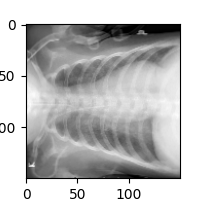

(150, 150)


In [19]:
print("the first element of X is", X_train[0])
print("The first element of y is",Y_train[0])
inputShape=np.squeeze(X_train[0],axis=-1).shape
NNutils.display_xRAY(X_train[8],inputShape)
print(inputShape)

## Neural Network

we can now implement our simple NN model

In [20]:
#code assignment starts here
tf.random.set_seed(1234)  # applied to achieve consistent results


NN_model = Sequential((
    [
        Flatten(input_shape=inputShape),
        
        BatchNormalization(),
        Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.1)),
    
        
        Dense(3, activation='linear')   
    ]
),name='Simple_NN')

NN_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #prefered way of implementing a softmax
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

#code assignment stops here

we can check our model's detail

In [21]:
NN_model.summary()

Model: "Simple_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 22500)             0         
                                                                 
 batch_normalization_1 (Batc  (None, 22500)            90000     
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                360016    
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 450,067
Trainable params: 405,067
Non-trainable params: 45,000
_________________________________________________________________


We use a a function that stop when the val encounter a plateau in order to avoid overfittin

In [22]:
Reduce_LR = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.3, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Compute class weights
class_weights = compute_class_weight('balanced',classes=np.unique(Y_train),y=Y_train)
# Convert class weights to a dictionary
class_weight_dict = dict(enumerate(class_weights))

### Testing

we can then fit our model and our data


In [23]:
#code from the assignment start here:
history = NN_model.fit(
    X_train,Y_train,
    epochs=70,
    validation_data = (x_val, y_val),
    class_weight=class_weight_dict,
    callbacks= [Reduce_LR,early_stopping],
)

#end of the code from assignment

Epoch 1/70
299/299 [==============================] - 3s 8ms/step - loss: 14.4784 - accuracy: 0.4758 - val_loss: 6.1955 - val_accuracy: 0.4636 - lr: 0.0010
Epoch 2/70
299/299 [==============================] - 3s 9ms/step - loss: 6.1482 - accuracy: 0.4783 - val_loss: 6.0951 - val_accuracy: 0.4866 - lr: 0.0010
Epoch 3/70
299/299 [==============================] - 6s 22ms/step - loss: 6.0524 - accuracy: 0.4986 - val_loss: 6.1988 - val_accuracy: 0.5220 - lr: 0.0010
Epoch 4/70
299/299 [==============================] - 3s 9ms/step - loss: 5.9849 - accuracy: 0.5219 - val_loss: 5.8340 - val_accuracy: 0.5766 - lr: 0.0010
Epoch 5/70
299/299 [==============================] - 8s 27ms/step - loss: 5.9266 - accuracy: 0.5211 - val_loss: 5.6861 - val_accuracy: 0.6331 - lr: 0.0010
Epoch 6/70
299/299 [==============================] - 13s 45ms/step - loss: 5.7829 - accuracy: 0.5336 - val_loss: 5.6164 - val_accuracy: 0.6475 - lr: 0.0010
Epoch 7/70
299/299 [==============================] - 14s 48ms/st

### Metrics on train set

We can observe the metrics of the model

In [24]:
# Prediction on our training data
y_pred_train = NN_model.predict(X_train)

#beginning of code from the assignment for softmax uses
prediction_p = tf.nn.softmax(y_pred_train)
y_pred_classes = np.argmax(prediction_p, axis=1)
print("direct output",y_pred_train[0])
print("with soft max", prediction_p[0])
print("with argmax", y_pred_classes[0])
#enf od code from assignment

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_train, y_pred_classes)

# Calculate precision, recall, specificity, and F1 score
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
precision = precision_score(Y_train, y_pred_classes, average=None, zero_division=1)
recall = recall_score(Y_train, y_pred_classes, average=None,zero_division=1)
f1 = f1_score(Y_train, y_pred_classes, average=None,zero_division=1)
train_accuracy = accuracy_score(Y_train, y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("the specifity", specificity)
print("the training accuracy is ", train_accuracy)

direct output [-0.6453303   0.22299394  0.25781673]
with soft max tf.Tensor([0.17093228 0.40731698 0.42175075], shape=(3,), dtype=float32)
with argmax 2
Precision: [0.6841964  0.59344436 0.49367089]
Recall: [0.80492424 0.70200125 0.31707317]
F1 Score: [0.73966642 0.64317433 0.38613861]
the specifity 0.9454949944382648
the training accuracy is  0.6073818485989126


An other way of calculating metrics

In [25]:
print(classification_report(Y_train, y_pred_classes,zero_division=1, target_names = ['Normal (Class 0)','Bacteria (Class 1)','Viral (class 2)']))
print("Loss of the model is - " , NN_model.evaluate(X_train,Y_train)[0])
print("Accuracy of the model is - " , NN_model.evaluate(X_train,Y_train)[1]*100 , "%")


                    precision    recall  f1-score   support

  Normal (Class 0)       0.68      0.80      0.74      3168
Bacteria (Class 1)       0.59      0.70      0.64      3198
   Viral (class 2)       0.49      0.32      0.39      3198

          accuracy                           0.61      9564
         macro avg       0.59      0.61      0.59      9564
      weighted avg       0.59      0.61      0.59      9564

299/299 [==============================] - 1s 4ms/step - loss: 0.9275 - accuracy: 0.6074
Loss of the model is -  0.9275217652320862
299/299 [==============================] - 1s 3ms/step - loss: 0.9275 - accuracy: 0.6074
Accuracy of the model is -  60.738182067871094 %


In [26]:
# Retrieve and print the weights of the first layer
first_layer_weights = NN_model.layers[1].get_weights()[0]
print(f"Weights of the first layer:\n{first_layer_weights}")

test_logits = NN_model.predict(x_test)
test_probs = tf.nn.softmax(test_logits, axis=-1)

# Display predicted probabilities for instances where class 2 is predicted
for i in range(len(x_test)):
    if y_test[i] == 2 and tf.argmax(test_probs[i]).numpy() == 2:
        print(f"Instance {i + 1} - True Label: {y_test[i]}, Predicted Probabilities: {test_probs[i]}")

Weights of the first layer:
[0.83882505 0.8107706  0.83671016 ... 0.42031932 0.54845923 0.53448284]
Instance 405 - True Label: 2, Predicted Probabilities: [0.2732441 0.3431113 0.3836446]
Instance 407 - True Label: 2, Predicted Probabilities: [0.2541946  0.3389584  0.40684694]
Instance 409 - True Label: 2, Predicted Probabilities: [0.23516157 0.33201674 0.43282163]
Instance 410 - True Label: 2, Predicted Probabilities: [0.35008073 0.28969684 0.36022243]
Instance 411 - True Label: 2, Predicted Probabilities: [0.25885418 0.36875877 0.3723871 ]
Instance 414 - True Label: 2, Predicted Probabilities: [0.17205767 0.40556422 0.42237818]
Instance 419 - True Label: 2, Predicted Probabilities: [0.20230047 0.38113877 0.4165608 ]
Instance 421 - True Label: 2, Predicted Probabilities: [0.31948978 0.24792503 0.43258524]
Instance 422 - True Label: 2, Predicted Probabilities: [0.3632603  0.26012653 0.37661317]
Instance 427 - True Label: 2, Predicted Probabilities: [0.24623464 0.36643645 0.38732892]
Ins

#### overfitting
We can plot the training accuracy and the validation accuracy to have a first idea of the overfitting of our model. If the Validation accuracy stops or decrease and the training one is increasing that might indicate case of overfitting the training set.
If the validation loss keep increasing and the training one keep decreasing that might suggest overfitting

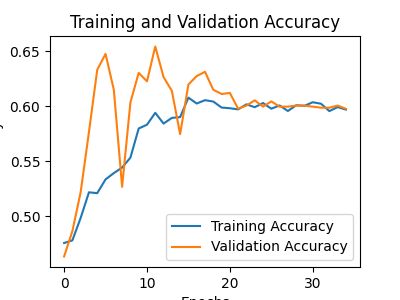

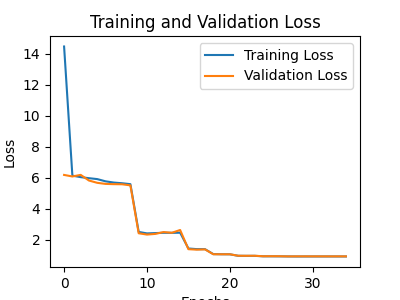

In [27]:
NNutils.plt_Training_Val_Accuracy(history)
NNutils.plt_Training_Val_loss(history)

### Prediction
we can now try our model on the test set


In [28]:
#prediction on the test set
y_pred_test=NN_model.predict(x_test)

#beginning of code from the assignment for softmax uses
prediction = tf.nn.softmax(y_pred_test)
prediction_classes = np.argmax(prediction, axis=1)
#enf od code from assignment

#print partly of the result
print("the first ten classes are :", prediction_classes[:10])

the first ten classes are : [0 2 0 1 0 0 0 0 0 0]


### Analysis of the prediction

we can calculate the metrics of our prediction of the test set this time to have even more information of our model

                    precision    recall  f1-score   support

  Normal (Class 0)       0.67      0.77      0.72       234
Bacteria (Class 1)       0.80      0.68      0.73       242
   Viral (class 2)       0.43      0.43      0.43       148

          accuracy                           0.66       624
         macro avg       0.63      0.63      0.63       624
      weighted avg       0.66      0.66      0.66       624

20/20 [==============================] - 1s 38ms/step - loss: 0.9664 - accuracy: 0.6571
Loss of the model is -  0.9664047360420227
20/20 [==============================] - 1s 37ms/step - loss: 0.9664 - accuracy: 0.6571
Accuracy of the model is -  65.70512652397156 %


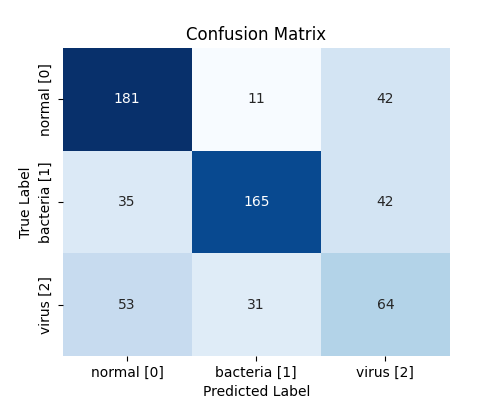

In [29]:
print(classification_report(y_test, prediction_classes,zero_division=1, target_names = ['Normal (Class 0)','Bacteria (Class 1)','Viral (class 2)']))
print("Loss of the model is - " , NN_model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , NN_model.evaluate(x_test,y_test)[1]*100 , "%")

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, prediction_classes)
NNutils.plt_conf_matrix(conf_matrix)


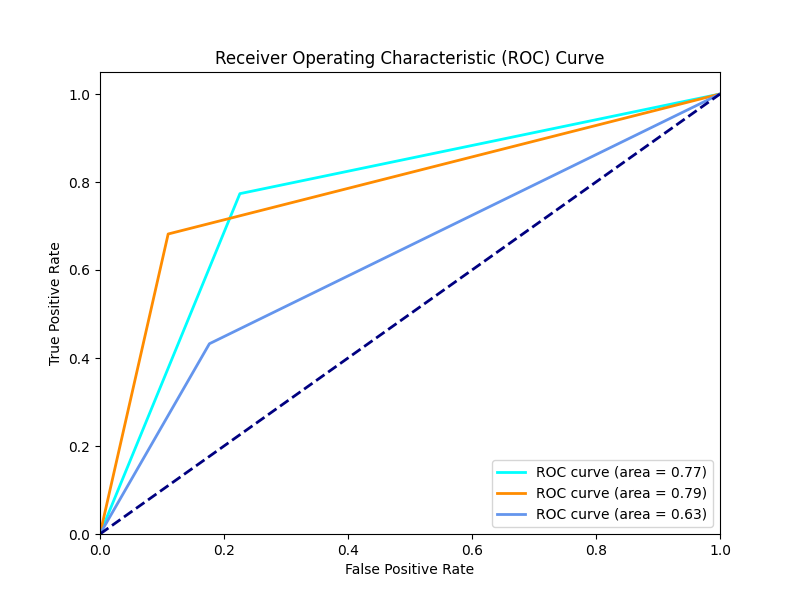

In [30]:
NNutils.plot_roc_curve(y_test, prediction_classes, 3)